## ĐỒ ÁN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU - THỰC HÀNH

### Thành viên:
- 20120634: Lê Minh Trí
- 20120633: Viên Hải Yến
- 20120219: Nguyễn Minh Trí
- 20120357: Nguyễn Đức Minh Quân


## **Mô tả đồ án:**
- Thực hiện quy trình khoa học dữ liệu với dữ liệu được chọn, cụ thể ở đây là danh sách các bộ phim trên Nexfilx được lấy về vào năm 2021, những bộ phim được Nexflix phát hành tình từ ngày 14/4/2015.
- Tự đặt các câu hỏi liên quan tới dữ liệu và có thể đào sâu được các vấn đề tiềm ẩn, từ đó trực quan hóa sinh động dữ liệu và tìm ra những điểm mấu chốt có thể áp dụng được trong mô hình dữ liệu.

### **Thời gian kết thúc đồ án:** 14/12/2022
### **Thời gian vấn đáp:** Tuần 12/12/2022
### **Nguồn của dữ liệu:**
##### Dữ liệu được lấy trên Kaggle dưới file exel, đường link dẫn đến  [Ở đây](https://www.kaggle.com/datasets/syedmubarak/netflix-dataset-latest-2021)

---

## Cách thức chạy

Nhấn vào ***Run all*** để chạy

import thư viện

In [1]:
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

## Thu thập dữ liệu

Dữ liệu được lấy trên Kaggle dưới file exel, đường link dẫn đến  [Ở đây](https://www.kaggle.com/datasets/syedmubarak/netflix-dataset-latest-2021)

---

## Khám phá dữ liệu

### Đọc dữ liệu

In [2]:
df=pd.read_excel('./dataset/Netflix Dataset Latest 2021.xlsx')
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


#### Dữ liệu bao nhiêu dòng bao nhiêu cột

In [3]:
num_rows,num_cols=df.shape
print('Số cột : {}'.format(num_cols))
print('Số dòng: {}'.format(num_rows))

Số cột : 29
Số dòng: 9425


#### Dữ liệu có các dòng bị lặp không?

In [4]:
have_duplicated_rows=df.duplicated().any()

if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


#### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Một dòng trong dữ liệu là về một bộ phim hoặc một Series được phát hành trên Nexflix với các trường thông tin giống nhau nhưng dữ liệu bên trong khác nhau là bình thường.

- Từ nhiều dòng như vậy ta sẽ có những kết luận về toàn bộ danh sách và so sánh được các khía cạnh trong bộ dữ liệu này. Với số lượng sản phẩm lớn như vậy **(Hơn 9000)**, đủ để ta có thể có những phân tích và đánh giá về thị trường phim trên Netflix hiện nay.

#### Dữ liệu có bị thiếu không ?

In [5]:
missing_ratio = df.isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio[missing_ratio > 0]

Genre                    0.002653
Tags                     0.003820
Languages                0.016870
Hidden Gem Score         0.001061
Country Availability     0.001167
Runtime                  0.000106
Director                 0.244562
Writer                   0.192042
Actors                   0.011777
View Rating              0.275650
IMDb Score               0.000849
Rotten Tomatoes Score    0.422281
Metacritic Score         0.566897
Awards Received          0.445517
Awards Nominated For     0.323501
Boxoffice                0.601698
Release Date             0.022069
Production House         0.533899
IMDb Link                0.034377
Summary                  0.000531
IMDb Votes               0.001061
Poster                   0.099523
Trailer Site             0.000106
dtype: float64

#### Mỗi cột có ý nghĩa gì?

| Index   |      Name     |  Meaning |
|---------|:--------------|:---------|
| 1       | Title         |Tên bộ phim|
| 2       | Genre         |Thể loại |
| 3       | Tags          |Các nhãn liên quan tới bộ phim (thường dùng để miêu tả thể loại, giúp người dùng tìm được những phim phim liên qua)|
| 4       | Languages|Ngôn ngữ được sử dụng trong bộ phim |
| 5       | Series or Movie          |Là phim dài tập hay phim chỉ 1 tập (chiếu rạp) |
| 6       | Hidden Gem Score          |Đánh giá độ tìm năng của phim|
| 7       | Country Availability          |Quốc gia sẵn có phim|
| 8       | Runtime          |Thời gian chiếu của phim (với những series thì là thời gian chiếu của từng tập phim)|
| 9       | Director          |Đạo diễn|
| 10      | Writer          |Biên kịch|
| 11      | Actors          |Diễn viên|
| 12      | View Rating          |Xếp loại về nội dung mà từ đó quyết định có phù hợp với người xem hay không<br>- G: tất cả mọi người<br>- PG (Parental Guidance Suggested): đề nghị có sự giám sát của cha mẹ vì chứa một vài yếu tố không phù hợp<br>- PG-13 : Đặc biệt lưu ý, không phù hợp với người dưới 13 tuổi<br>- R (Restricted): người dưới 17 tuổi yêu cầu có cha mẹ hoặc người giám hộ đi cùng<br>- NC-17: Không cho phép người 17 tuổi và dưới 17 tuổi |
| 13      | IMDb Score          |Điểm số được tính trên IMDb |
| 14      | Rotten Tomatoes Score          |Điểm được đánh giá trên website  Rotten Tomatoes (thang điểm 10)<br> Đây là trang chuyên đánh giá các bộ phim |
| 15      | Metacritic Score          |Điểm được đánh giá trên Metacritic (thang điểm 100) <br>Metacritic là một trang mạng tổng hợp các bài đánh giá album nhạc, trò chơi điện tử, phim điện ảnh, chương trình truyền hình và đĩa DVD. |
| 16      | Awards Received          |Số giải thưởng nhận được|
| 17      | Awards Nominated For          |Số giải thưởng được đề cử|
| 18      | Boxoffice          |Doanh thu phòng vé|
| 19      | Release Date          |Ngày phát hành|
| 20      | Netflix Release Date          |Ngày phát hành trên Nexflix |
| 21      | Production House          |Nhà sản xuất|
| 22      | Netflix Link          |Đường dẫn tới film trên Nexflix|
| 23      | IMDb Link          |Đường dẫn tới film trên IMDb |
| 24      | Summary          |Tóm tắt nội dung|
| 25      | IMDb Votes          |Số lượng bình chọn trên IMDb|
| 26      | Image          |Hình ảnh của bộ phim|
| 27      | Poster          |Poster của phim|
| 28      | TMDb Trailer          |Trailer film|
| 29      | Trailer Site         |Tên của trang web chứa trailer|

#### Mỗi cột hiện đang có kiểu dữ liệu gì?

In [6]:
df.dtypes

Title                            object
Genre                            object
Tags                             object
Languages                        object
Series or Movie                  object
Hidden Gem Score                float64
Country Availability             object
Runtime                          object
Director                         object
Writer                           object
Actors                           object
View Rating                      object
IMDb Score                      float64
Rotten Tomatoes Score           float64
Metacritic Score                float64
Awards Received                 float64
Awards Nominated For            float64
Boxoffice                       float64
Release Date             datetime64[ns]
Netflix Release Date     datetime64[ns]
Production House                 object
Netflix Link                     object
IMDb Link                        object
Summary                          object
IMDb Votes                      float64


In [7]:
print(df.loc[1])

Title                                                  HOW TO BUILD A GIRL
Genre                                                               Comedy
Tags                          Dramas,Comedies,Films Based on Books,British
Languages                                                          English
Series or Movie                                                      Movie
Hidden Gem Score                                                       7.0
Country Availability                                                Canada
Runtime                                                           1-2 hour
Director                                                     Coky Giedroyc
Writer                                                       Caitlin Moran
Actors                   Cleo, Paddy Considine, Beanie Feldstein, Dónal...
View Rating                                                              R
IMDb Score                                                             5.8
Rotten Tomatoes Score    

 #### ***Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?***

- Runtime đưa về kiểu tuple theo số phút để dễ phân loại và xử lý

- "Genre", "Tags", "Languages", "Country Availability", "Writer", "Actors", "Production House" đang là dạng chuỗi và cần đưa về kiểu tuple

### Tiền xử lí dữ liệu

Liệt kê các vấn đề gặp phải để tiền xử lí

<u>***Vấn đề 1:***</u>  Cột "Runtime" đang ở dạng chuỗi cần được chuyển sang dạng tuple để dễ phân biệt được thời lượng phim

In [8]:
transform_dict={'< 30 minutes':(0,0.5),
                '1-2 hour':(1,2),
                '> 2 hrs':(2,np.nan),
                '30-60 mins':(0.5,1)}
# df['Runtime']=df['Runtime'].transform(lambda x: transform_dict[x] if x is not np.nan else x)
df['Runtime']=df['Runtime'].transform(lambda x: transform_dict[x] if x in transform_dict.keys() else (np.nan,np.nan))
df['Runtime'].unique()

array([(0, 0.5), (1, 2), (2, nan), (0.5, 1), (nan, nan)], dtype=object)

<u>***Vấn đề 2:***</u> Có cột nào không cần thiết hay không, nếu có thì xoá cột đó.

Các cột trích dẫn trang web có vẻ như không cần thiết?

- Không cần thiết các cột về hình ảnh "Image" cũng như "Poster" của phim, và cả cột "Trailer Site".

- Còn các cột đường dẫn về trang phim ""Netflix Link", trang đánh giá "IMDb Link" và trang trailer của film "TMDb Trailer" đôi lúc cần để thu thập dữ liệu lượt xem cũng như tổng hợp lại các thông tin cần thiết nên ta vẫn giữ lại.

In [9]:
df = df.drop(['Image', 'Poster', 'Trailer Site'], axis=1)

<u>***Vấn đề 3:***</u>  Các cột "Genre", "Tags", "Languages", "Country Availability", "Writer", "Actors", "Production House" đang ở dạng chuỗi, nên được đưa sang dạng tuple để thể hiện danh sách rõ hơn

In [10]:
columns=["Genre","Tags","Languages","Country Availability","Writer","Actors","Production House"]
for col in columns:
    if col == "Genre":
         df[col]=df[col].transform(lambda x: tuple(x.split(', ')) if x is not np.nan else x)
    else:
        df[col]=df[col].transform(lambda x: tuple(x.split(',')) if x is not np.nan else x)

df['Genre']

0       (Crime, Drama, Fantasy, Horror, Romance)
1                                      (Comedy,)
2                              (Comedy, Romance)
3                                       (Drama,)
4                                       (Drama,)
                          ...                   
9420                  (Comedy, Fantasy, Romance)
9421                              (Documentary,)
9422                        (Documentary, Music)
9423                                   (Comedy,)
9424                 (Animation, Comedy, Family)
Name: Genre, Length: 9425, dtype: object

---

### **Khám phá sau khi tiền xử lí**

#### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta sẽ xếp các cột datetime vào nhóm numeric luôn. Hiện có 10 cột thuộc nhóm numeric: "Hidden Gem Score", "IMDb Score", "Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For", "Boxoffice", "Release Date", "Netflix Release Date", "IMDb Votes".

Với mỗi cột numeric, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max".

In [11]:
# YOUR CODE HERE
nume_col_df = df[["Hidden Gem Score","Runtime", "IMDb Score", "Rotten Tomatoes Score", "Metacritic Score", "Awards Received", "Awards Nominated For", "Boxoffice", "Release Date", "Netflix Release Date", "IMDb Votes", ]]
missing_ratio = nume_col_df.isnull().sum()*100/len(nume_col_df)
min = nume_col_df.min()
max = nume_col_df.max()
row_name = ['missing_ratio','min','max']
nume_col_profiles_df = pd.DataFrame([missing_ratio,min,max],index=row_name )
nume_col_profiles_df

c:\Users\minht\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\minht\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
missing_ratio,0.106101,0.0,0.084881,42.228117,56.689655,44.551724,32.350133,6.016976e+01,2.206897,0.0,1.061008e-01
min,0.600000,"(0, 0.5)",1.600000,0.000000,6.000000,1.000000,1.000000,7.200000e+01,1913-10-27 00:00:00,2015-04-14 00:00:00,5.000000e+00
max,9.800000,"(2, nan)",9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2021-11-12 00:00:00,2021-03-04 00:00:00,2.354197e+06


#### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào? 

Với mỗi cột categorical, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"

In [12]:
cate_col_profiles_df = df.drop(["Hidden Gem Score", "IMDb Score", "Rotten Tomatoes Score", "Metacritic Score",
                                "Awards Received", "Awards Nominated For", "Boxoffice", "Release Date",
                                "Netflix Release Date", "IMDb Votes" ], axis = 1)
missing_ratio = cate_col_profiles_df.isnull().sum() * 100 / len(df)
num_diff = cate_col_profiles_df.nunique()
list_unique = num_diff.copy()
list_unique
for col in cate_col_profiles_df.columns:
    list_unique[col] = cate_col_profiles_df[col].dropna().unique().tolist()

cate_col_profiles_df = pd.DataFrame(data = [missing_ratio, num_diff, list_unique], 
                                  index = ['missing_ratio', 'num_diff_vals', 'diff_vals'])

In [13]:
cate_col_profiles_df

,Title,Genre,Tags,Languages,Series or Movie,Country Availability,Runtime,Director,Writer,Actors,View Rating,Production House,Netflix Link,IMDb Link,Summary,TMDb Trailer
missing_ratio,0.0,0.265252,0.381963,1.687003,0.0,0.116711,0.0,24.456233,19.204244,1.177719,27.564987,53.38992,0.0,3.437666,0.05305,0.0
num_diff_vals,9166,1531,8552,1209,2,5281,5,4252,6524,8835,24,3276,9425,8826,9415,9110
diff_vals,"[Lets Fight Ghost, HOW TO BUILD A GIRL, The Co...","[(Crime, Drama, Fantasy, Horror, Romance), (Co...","[(Comedy Programmes, Romantic TV Comedies, Hor...","[(Swedish, Spanish), (English,), (Thai,), (Po...","[Series, Movie]","[(Thailand,), (Canada,), (Poland,), (Lithuania...","[(0, 0.5), (1, 2), (2, nan), (0.5, 1), (nan, n...","[Tomas Alfredson, Coky Giedroyc, Mez Tharatorn...","[(John Ajvide Lindqvist,), (Caitlin Moran,), (...","[(Lina Leandersson, Kåre Hedebrant, Per Ragn...","[R, PG-13, PG, TV-14, TV-MA, TV-Y7, Not Rated,...","[(Canal+, Sandrew Metronome), (Film 4, Monum...","[https://www.netflix.com/watch/81415947, https...","[https://www.imdb.com/title/tt1139797, https:/...",[A med student with a supernatural gift tries ...,"[https://www.youtube.com/watch?v=LqB6XJix-dM, ..."


---

## Trả lời câu hỏi (Tự đặt và trả lời)

**Câu hỏi 1:** Phân tích về điểm số của thể loại phim chiếu rạp và series

Trực quan điểm số của thể loại `Series` và `Movie`

**Biểu đồ tương quan các mức độ điểm của 2 thể loại là Movie và Series trên các nền tảng đánh giá**

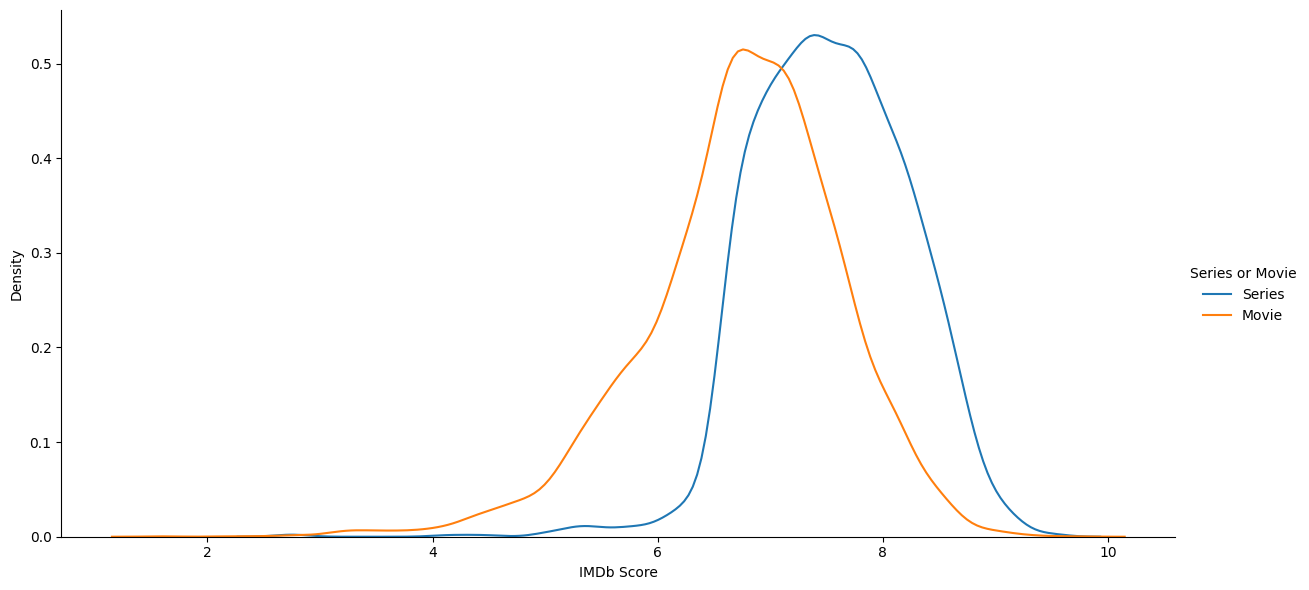

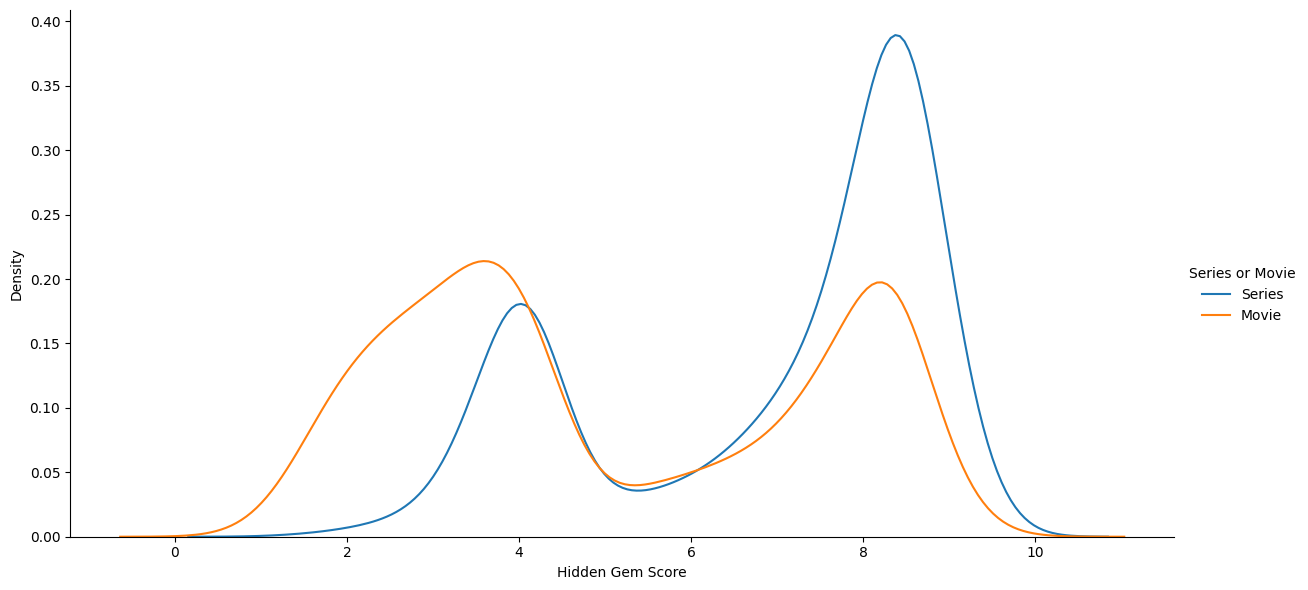

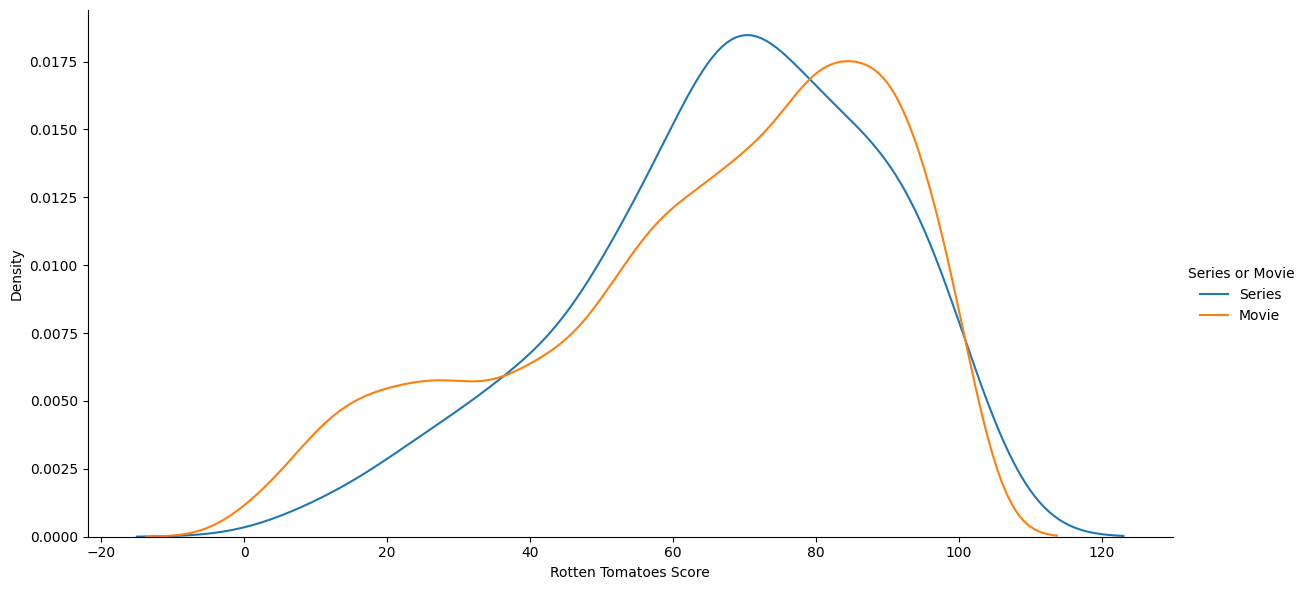

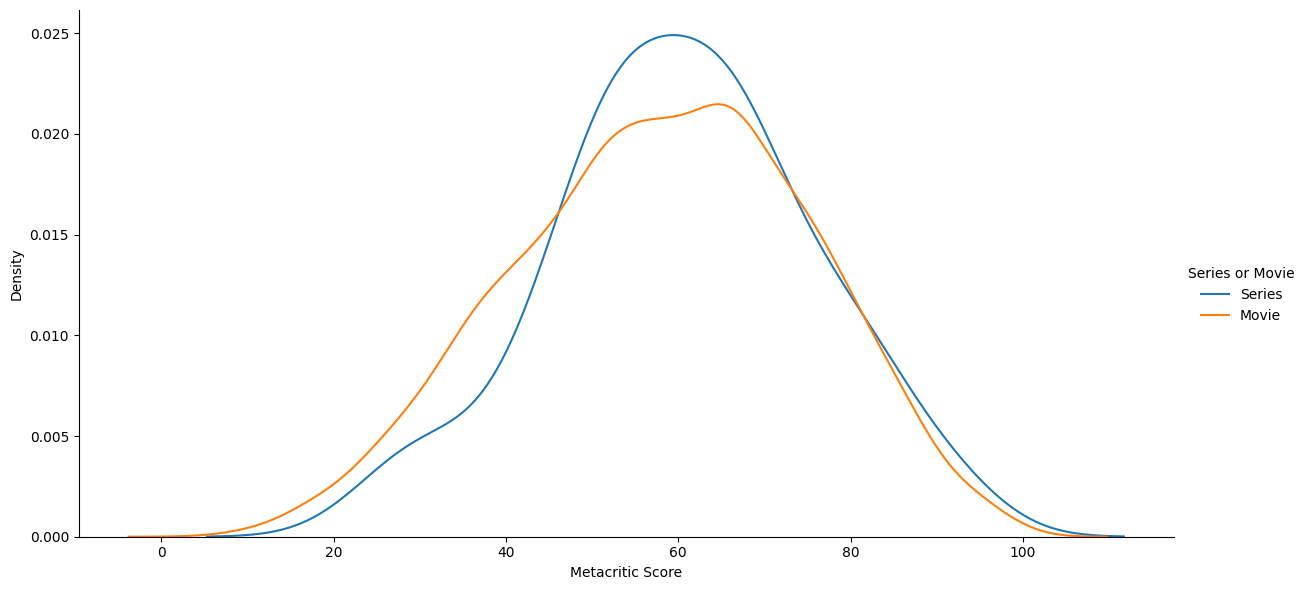

In [14]:
scores=["IMDb Score", "Hidden Gem Score","Rotten Tomatoes Score","Metacritic Score"]
for score in scores:
    g=sns.FacetGrid(df, height=6,aspect=2,hue="Series or Movie")
    g.map_dataframe(sns.kdeplot, x=score)
    # g.set(xticks=np.arange(0,10,0.5))
    g.add_legend()

#### ***NHẬN XÉT***
**Nhìn chung thì thể loại phim nhiều tập chiếm thang điểm cao hơn so với phim chiếu rạp và được đánh giá trên nhiều trang phân tích phim**. Một số nguyên nhân được chỉ ra như sau:
- Phim chiếu rạp bị giới hạn thời gian chiếu nên có nhiều đoạn trong nguyên tác bị cắt ghép để đảm bảo thời lượng phim, điều đó gây ảnh hưởng trầm trọng tới chất lượng bộ phim hay còn nói là sự liền mạch gắn kết. Các chi tiết quan trọng thì có thể sẽ được các nhà làm phim chú ý đưa lên, nhưng vẫn không thể đảm bảo cho việc kết cấu phim bị thay đổi.
- Các bộ phim series thì đang trở thành cơn sốt toàn cầu, đặc biệt với nhà sản xuất phim như Nexflix đang cố tạo ra những tác phẩm phim dài tập với nội dung liền mạch gây cấn, cốt truyện rành mạch rõ ràng và đặc biệt là đủ thời gian chiếu để kéo dài cảm xúc người xem.
> Vậy nên là dễ hiểu khi điểm của 2 loại phim này có sự chênh lệch nhất định với phần thắng nghiêng về phía các bộ phim series trên nền tảng dữ liệu lấy từ Nexflix.

**Câu hỏi 2:** Liệu thời gian chiếu của phim có ảnh hướng tới điểm của phim ở các nền tảng đánh giá phim không ?

- Áp dụng masking ```maskMovie & maskScore``` để lấy các data frame cần thiết.
- Vì điểm IMDb ở hệ 10, các nền tảng còn lại ở thang điểm 100 nên nhân điểm số ở cột ```IMDb Score``` cho 10.
- Tính toán và thể hiện cột ```Average_Score``` là điểm số trung bình của các nền tảng đánh giá.

c:\Users\minht\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


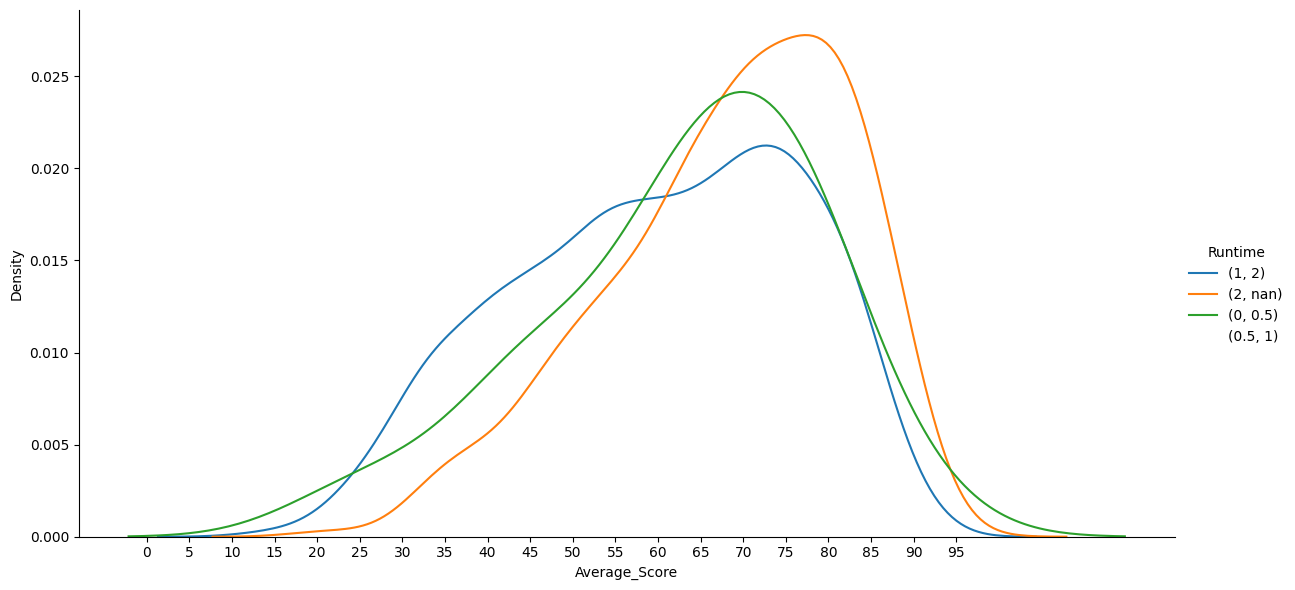

In [15]:
df.head()

maskMovie = df['Series or Movie'] == 'Movie'

maskScore = df['IMDb Score'].notnull() & df['Rotten Tomatoes Score'].notnull() & df['Metacritic Score'].notnull()

df_runtime_relate_to_score = df[maskMovie & maskScore][['Runtime','IMDb Score','Rotten Tomatoes Score','Metacritic Score']]
df_runtime_relate_to_score['IMDb Score'] = df_runtime_relate_to_score['IMDb Score'] * 10

df_runtime_relate_to_score = df_runtime_relate_to_score.assign(Average_Score = lambda x: (x['IMDb Score'] + x['Rotten Tomatoes Score'] + x['Metacritic Score'])/3)

g = sns.FacetGrid(df_runtime_relate_to_score, height=6,aspect=2,hue="Runtime")
g.map_dataframe(sns.kdeplot, x="Average_Score")
g.set(xticks=np.arange(0,100,5))
g.add_legend()

#### ***NHẬN XÉT***
- Chiếm ưu thế về số lượng cũng như điểm số trung bình, đứng đầu là các bộ phim có thời gian chiếu từ 2 tiếng trở lên. Các phim với thời lượng trong khoảng này có thể truyền đạt nhiều nội dung cũng như ý nghĩa hơn, nên có thể đây là lý do các bộ phim này có điểm trung bình cao hơn hẳn. Đây là lựa chọn an toàn cho các nhà làm phim.
- Có thể thấy các bộ phim từ 1 - 2 tiếng có mật độ điểm từ 25 - 40 cao hơn hẳn so với các thể loại phim còn lại. Một số lý do có thể là các bộ phim từ 0 - 1 tiếng thường là các tập lẻ trong một series phim dài, đảm bảo yếu tố truyền tải nội dung. Các bộ phim từ 1 - 2 tiếng thường là các phim lẻ, riêng biệt. Do đó dẫn đếm điểm số thấp hơn.

**Câu hỏi 3:** Thể loại phim nào đang phổ biến trên Netflix

Thống kê số lượng các thể loại phim trên Netflix

In [16]:
df1=df[['Genre']].copy().dropna()
df1=df1.Genre.apply(pd.Series).merge(df1,right_index=True,left_index=True)
df1=df1.melt(id_vars=['Genre'],value_name="Genre_Split")
df1=df1.drop(["variable","Genre"],axis=1).dropna()
df1['Count']=np.ones(len(df1))
df1=df1.groupby(['Genre_Split'])['Count'].sum().to_frame().reset_index(names="Genre_Split")
df1=df1.sort_values(by=["Count"],ascending=False,ignore_index=True)
df1

,Genre_Split,Count
0,Drama,4803.0
1,Comedy,3305.0
2,Action,2149.0
3,Thriller,2071.0
4,Romance,1812.0
5,Crime,1512.0
6,Adventure,1355.0
7,Fantasy,1228.0
8,Animation,1173.0
9,Sci-Fi,955.0


Lấy ra top 7 thể loại phim có số lượng lớn nhất

In [17]:
show_amount=7

other=["Other",df1["Count"][show_amount:].sum()]
df1=df1.drop(np.arange(show_amount,len(df1)))
df1.loc[len(df1)]=other

Biểu đồ thể hiện thị phần thể loại phim trên Netflix

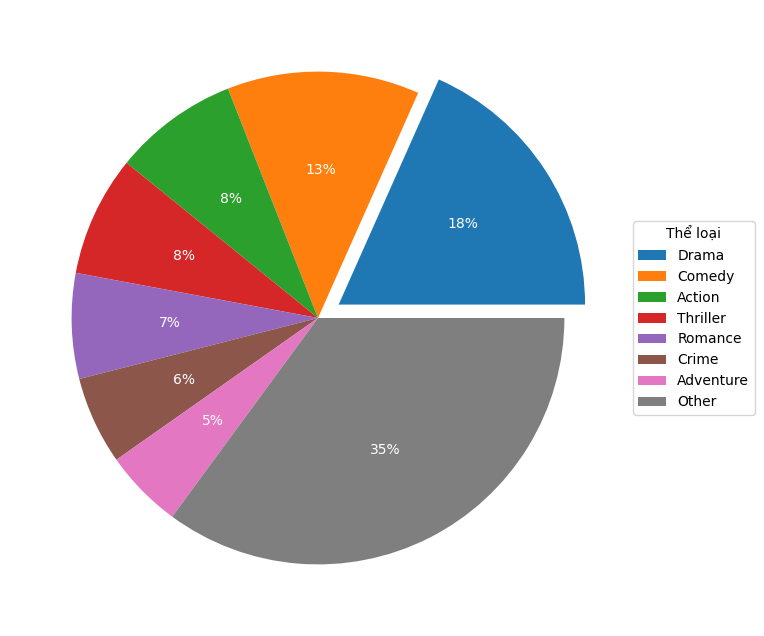

In [18]:
fig, ax = plt.subplots(figsize=(18,8))
wedges, texts, autotexts = ax.pie(df1['Count'], 
        autopct='%.0f%%',
        explode=np.concatenate((np.array([0.1]),np.zeros(len(df1)-1))),
        textprops={'color':"w"}
        )
ax.legend(wedges, df1['Genre_Split'],
          title="Thể loại",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

#### ***NHẬN XÉT***
- Hiện tại thể loại phổ biến được công chiếu trên Nexflix là Drama- một thể loại phim nhiều tập mà xuyên suốt là cuộc đời của 1 hay nhiều nhân vật chính có nội dung gây cấn, diễn biến phức tạp, tâm lý khó đoán. Điều đó cũng là lí do mà hiện tại Nexflix đang trong quá trình sản xuất/công chiếu hành loạt những series phim, tiêu biểu như: "Cô gái đến từ hư vô", "Wednesday", "Squid game",...
- Tiếp đến là thể loại hài kịch nhắm nhắm tới đa dạng người xem, chủ yếu mang yếu tố giải trí nhưng lại được lòng nhiều người.
Những phim hành động và kinh dị cũng xếp sau đó với 8%
- Phim tình cảm chiếm 7%
- Các bộ phim về tội phạm và phiêu lưu cũng chiếm một phần trong tổng số dữ liệu.


**Câu hỏi 4:** Top 30 các nhà sản xuất phim và thể loại họ sản xuất nhiều nhất / ít nhất là gì ?

In [19]:
mask = df['Production House'].notnull() & df['Genre'].notnull() &  df['Awards Nominated For'].notnull() & df['Awards Received'].notnull() 
df_production_house = df[mask][['Production House','Awards Nominated For','Awards Received','Genre']]

In [20]:
top_production_house = df_production_house['Production House'].value_counts().index[:30]
top_production_house

Index([           ('Paramount Pictures',),            ('Universal Pictures',),
       ('Columbia Pictures Corporation',),               ('Warner Brothers',),
                 ('Working Title Films',),           ('Excel Entertainment',),
                      ('Lucasfilm Ltd.',),          ('DreamWorks Animation',),
                    ('TriStar Pictures',),                       ('Miramax',),
                           ('Paramount',),                       ('Netflix',),
                     ('New Line Cinema',),       ('Di Bonaventura Pictures',),
                   ('Columbia Pictures',),                ('Marvel Studios',),
           ('Happy Madison Productions',),       ('Zentropa Entertainments',),
                      ('DreamWorks SKG',),             ('Toho Company Ltd.',),
             ('Sony Pictures Animation',),    ('Warner Brothers/Seven Arts',),
                       ('Original Film',),                 ('El Deseo S.A.',),
                     ('Arka Mediaworks',),          

In [21]:
df_contain_prod_house = df_production_house[df_production_house['Production House'].isin(top_production_house)]
df_contain_prod_house

,Production House,Awards Nominated For,Awards Received,Genre
10,"(Lucasfilm Ltd.,)",69.0,26.0,"(Action, Adventure, Fantasy, Sci-Fi)"
46,"(Columbia Pictures Corporation,)",11.0,5.0,"(Adventure, Drama)"
54,"(CJ Entertainment,)",27.0,7.0,"(Action, Comedy, Crime)"
71,"(Di Bonaventura Pictures,)",19.0,4.0,"(Action, Comedy, Crime, Thriller)"
126,"(Excel Entertainment,)",11.0,1.0,"(Action, Crime, Thriller)"
...,...,...,...,...
9269,"(Original Film,)",5.0,5.0,"(Action, Adventure, Crime, Thriller)"
9303,"(Columbia Pictures Corporation,)",49.0,33.0,"(Drama, Romance)"
9306,"(Columbia Pictures Corporation,)",11.0,6.0,"(Biography, Drama)"
9337,"(Sony Pictures Animation,)",14.0,1.0,"(Animation, Adventure, Comedy, Family, Fantasy..."


In [22]:
production_house_genre = []

for prod_house in top_production_house:
    df_prod_house = df_contain_prod_house[df_contain_prod_house['Production House'].isin([prod_house])]
    genre_list = []
    for genre in df_prod_house['Genre']:
        genre_list.extend(genre)

    most_produced_genre = pd.Series(genre_list).value_counts().index[0]
    least_produced_genre = pd.Series(genre_list).value_counts().index[-1]
    production_house_genre.append({'Production House':prod_house[0],'Most Produced Genre':most_produced_genre,'Least Produced Genre':least_produced_genre})
production_house_genre= pd.DataFrame(production_house_genre)
production_house_genre

,Production House,Most Produced Genre,Least Produced Genre
0,Paramount Pictures,Drama,Western
1,Universal Pictures,Drama,Mystery
2,Columbia Pictures Corporation,Drama,Biography
3,Warner Brothers,Drama,Animation
4,Working Title Films,Drama,Family
5,Excel Entertainment,Action,War
6,Lucasfilm Ltd.,Action,Sci-Fi
7,DreamWorks Animation,Animation,Sport
8,TriStar Pictures,Drama,War
9,Miramax,Drama,War


**Câu hỏi 5:** Có phim nào điểm đánh giá thấp nhưng vẫn đạt nhiều giải hay không ?

In [23]:
df['Awards Received'].median()

4.0

Xét thấy trung vị của df['Awards Received'] là 4 => nếu trên 4 sẽ là cao, dưới 4 sẽ là thấp

In [24]:
mask = df['Awards Received'].notnull() & df['IMDb Score'].notnull() & df['Rotten Tomatoes Score'].notnull() & df['Metacritic Score'].notnull()
df_movie_award = df[mask][['Title','Awards Received','IMDb Score','Rotten Tomatoes Score','Metacritic Score']]
df_movie_award['IMDb Score'] = df_movie_award['IMDb Score'] * 10

df_movie_award = df_movie_award.assign(Average_Score = lambda x: (x['IMDb Score'] + x['Rotten Tomatoes Score'] + x['Metacritic Score'])/3)

mask_low_rating = df_movie_award['Average_Score'] < 30
mask_high_award = df_movie_award['Awards Received'] >= 5

df_high_award_low_rating = df_movie_award[mask_low_rating & mask_high_award].sort_values(by=['Awards Received'],ascending=False)
df_high_award_low_rating

,Title,Awards Received,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Average_Score
5783,Battlefield Earth,19.0,25.0,3.0,9.0,12.333333
7688,Jack and Jill,14.0,33.0,3.0,23.0,19.666667
6510,Catwoman,13.0,34.0,9.0,27.0,23.333333
4284,Swept Away,8.0,36.0,5.0,18.0,19.666667
6272,Fantastic Four,8.0,43.0,9.0,27.0,26.333333
8539,The Last Airbender,8.0,40.0,5.0,20.0,21.666667
8636,Norbit,8.0,41.0,9.0,27.0,25.666667
9394,Sex and the City 2,8.0,45.0,16.0,27.0,29.333333
4550,The Emoji Movie,7.0,33.0,7.0,12.0,17.333333
7582,Son of the Mask,7.0,22.0,6.0,20.0,16.000000


***Ý nghĩa câu hỏi:*** Câu hỏi này nhằm chứng thực tính đúng đắn khi nhìn và điểm số (của nhiều người trên IMDb, Rotten Tomatoes, Metacritic) so với cái nhìn của những ban tổ chức cho các giải thưởng về làm phim. Ở đây không xét tới khía cạnh đâu là kết luận đúng về độ hay dở của phim mà chỉ là liệu 2 con số được nêu ra nó có xảy ra bất đồng hay không.

#### ***NHẬN XÉT***
Ở đây ta xét 2 khía cạnh là Điểm trung bình đến từ 3 nền tảng và số lượng giải thưởng đạt được:
- Điểm trung bình thấp khi nó <30
- Số giải thưởng cao thi >=5

**Kết luận:** Các phim được liệt kê ở trên cho thấy vẫn có nhiều phim với điểm số tb thấp đến từ ý kiến của người xem, nhưng qua kiểm định của các chuyên gia về phim, nó lại đạt được nhiều giải thưởng.\
Nguyên nhân này là do sự bất đồng về ý kiến và lĩnh vực, có thể là do người xem phổ thông không hiểu được hết tất cả các giá trị của phim đem đến mà chỉ những nhà là về phim mới đủ khả năng để hiểu. Hoặc, đó là do giải thưởng được trao phù hợp với chủ đề của phim nhưng phim hiện lại không phải thị yếu của khán giả, khong cung cấp đủ những yếu tố mà người xem mong muốn (không xét độ hay dỡ, mà xts độ phù hợp)

**Câu hỏi 6:** Việc giới hạn độ tuổi phim có ảnh hưởng đến lượt xem và các giải thưởng đạt được hay không ?

Xem tất cả View Rating có trong dataframe

In [31]:
all_view_rating =  df['View Rating'].value_counts().to_frame().reset_index()
all_view_rating

,index,View Rating
0,R,1845
1,PG-13,1267
2,Not Rated,941
3,TV-MA,843
4,TV-14,642
5,PG,561
6,TV-PG,268
7,G,88
8,TV-Y,88
9,Unrated,85


Phân loại View Rating và để vào Dictionary

In [48]:
view_rating_adult = ["NC-17","R","TV-MA"]
view_rating_adults_only = ["X","TV-14","TV-MA"]
view_rating_adults_and_children = ["PG","PG-13","TV-PG","TV-14"]
view_rating_children = ["TV-Y","TV-Y7","TV-Y7-FV","TV-G"]
view_rating_general = ["G","TV-G"]

view_ratting = {
    "Adult": view_rating_adult,
    "Adults Only": view_rating_adults_only,
    "Adults and Children": view_rating_adults_and_children,
    "Children": view_rating_children,
    "General": view_rating_general
}

Gán Group View Rating theo Dictionary mình đã lọc và tiến hành trực quan hoá dữ liệu

C:\Users\minht\AppData\Local\Temp\ipykernel_15592\2484931652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_view_rating['View Rating'] = view_rating
C:\Users\minht\AppData\Local\Temp\ipykernel_15592\2484931652.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot_view_rating = df_plot_view_rating.append(df_view_rating)
C:\Users\minht\AppData\Local\Temp\ipykernel_15592\2484931652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

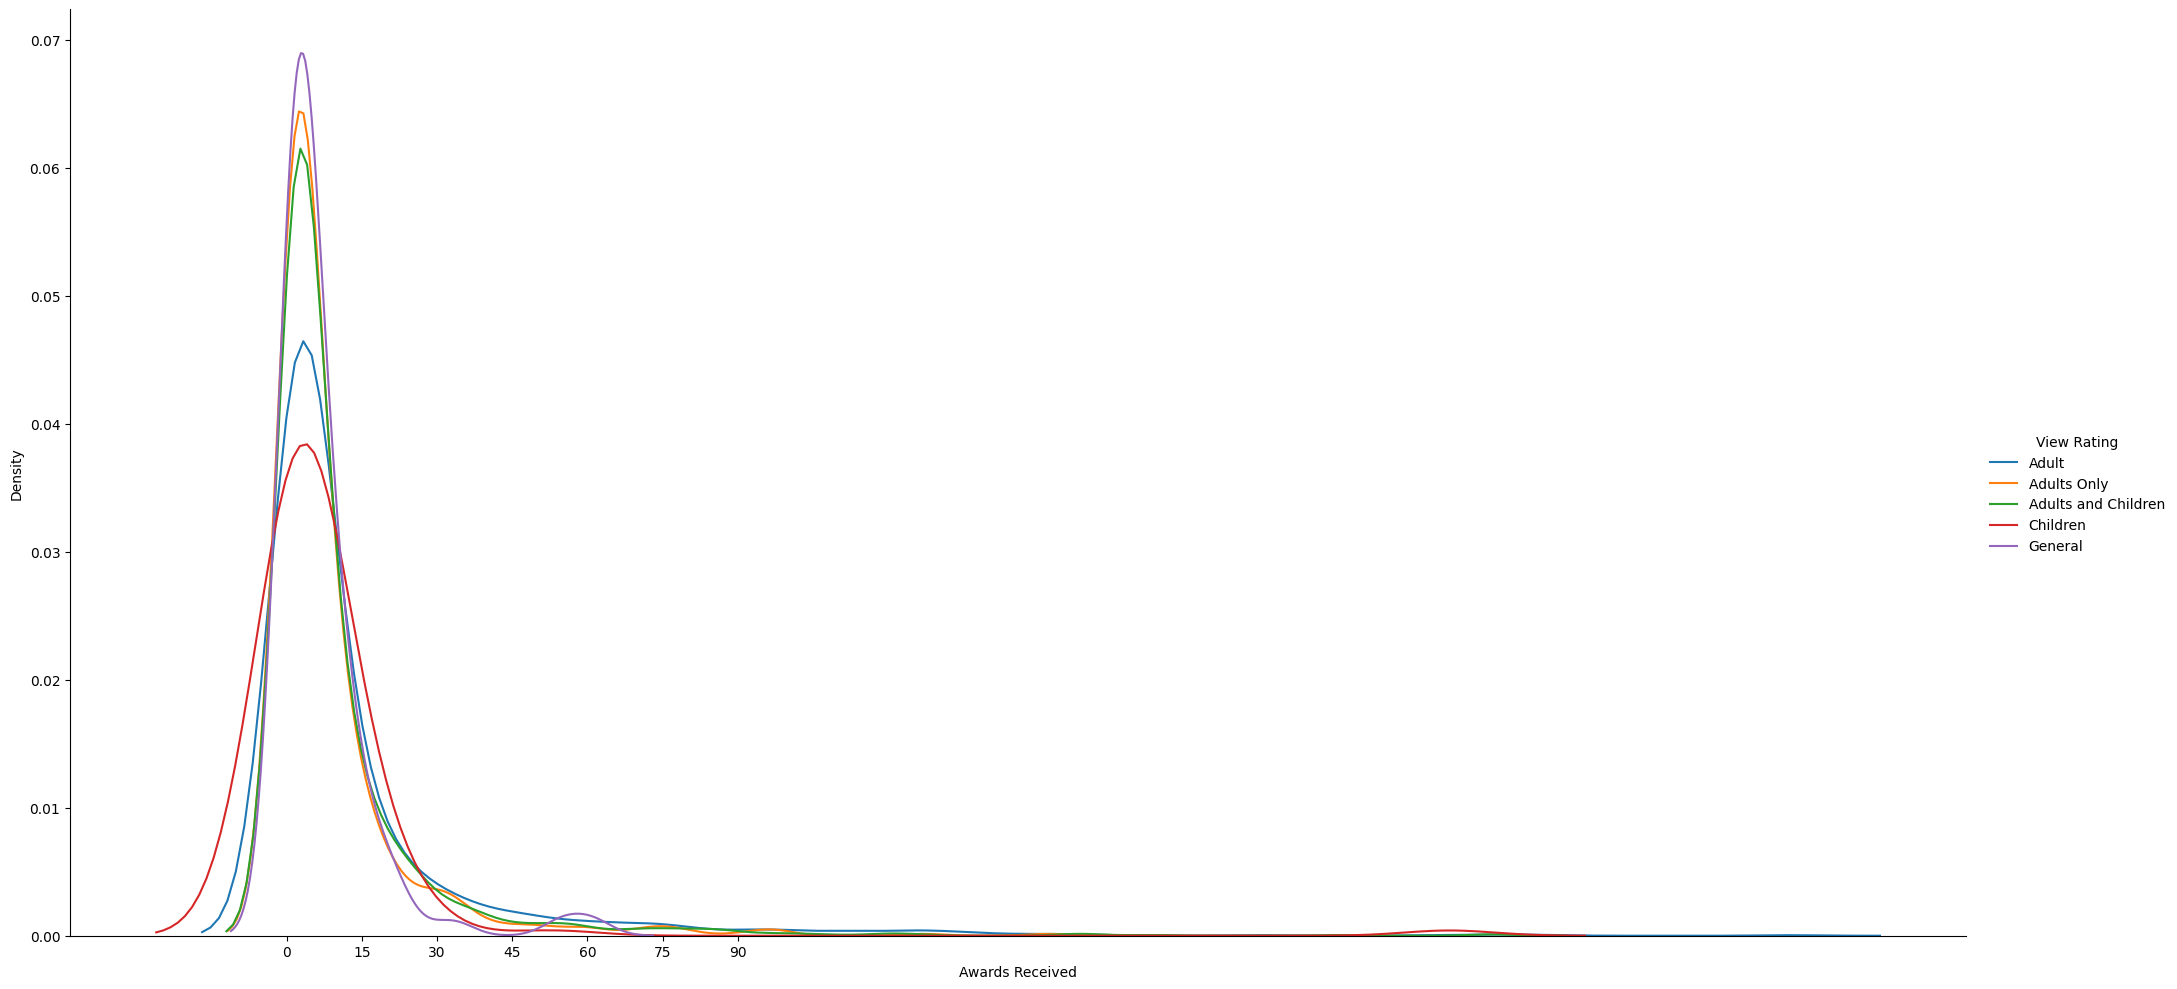

In [50]:
mask = df['Awards Received'].notnull() & df['View Rating'].notnull()
df_view_rating_award = df[mask][['Title','Awards Received','View Rating']]
df_plot_view_rating = pd.DataFrame()

for view_rating in view_ratting:
    df_view_rating = df_view_rating_award[df_view_rating_award['View Rating'].isin(view_ratting[view_rating])]
    df_view_rating['View Rating'] = view_rating
    df_plot_view_rating = df_plot_view_rating.append(df_view_rating)

g = sns.FacetGrid(df_plot_view_rating, height=10,aspect=2,hue="View Rating",)
g = g.map_dataframe(sns.kdeplot, x="Awards Received",label=view_rating)
g = g.set(xticks=np.arange(0,100,15))
g = g.add_legend()

***Ý nghĩa của câu hỏi:*** Giúp các nhà làm phim lựa chọn khuynh hướng sản xuất phim phù hợp với yêu cầu các giải thưởng. Chỉ ra rằng việc giới hạn độ tuổi là yếu tố quan trọng trong việc phát triển bộ phim có trở nên nổi tiếng và có được những danh hiệu.

#### ***NHẬN XÉT***
Tương đối các phim không tạo quá nhiều khác biệt khi dàn trải ở các giải thưởng tương đối như nhau.
Tuy nhiên, có thể thấy sự ưu thế ở khoảng giữa các giải từ 20 - 30 của các phim thuộc lĩnh vực trẻ em

**Kết luận:** Việc tạo ra các nội dung phù hợp với lứa tuổi cho các trẻ em hiện nay có nhiều ưu thế trong các giải thưởng.

**Câu hỏi 7:** Số lượng phim phát hành vào các tháng qua thời gian? Nếu muốn phát hành 1 nội dung thì nên chọn tháng nào để ít cạnh tranh?

Thống kê số lượng phim phát hành vào các tháng giai đoạn 2008 đến nay

In [26]:

df1=df[['Title','Release Date']].copy()
df1.dropna(inplace=True)
df1['Month']=df1['Release Date'].transform(lambda x: x.month)
df1['Year']=df1['Release Date'].transform(lambda x: x.year)
df1=df1[df1['Year'] >= 2008]
df1['Year']=df1['Year'].transform(lambda x: x % 100)

df1['Month']=df1['Release Date'].transform(lambda x: x.month_name())
df1=df1.groupby(['Year','Month'])['Title'].count().unstack(level=0)
df1=df1.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
df1=df1.fillna(0)
df1

Year,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Month,,,,,,,,,,,,,,
January,17.0,21.0,30.0,35.0,38.0,28.0,44.0,42.0,63.0,73.0,68.0,64.0,55.0,27.0
February,20.0,18.0,15.0,18.0,24.0,32.0,30.0,35.0,53.0,63.0,64.0,61.0,47.0,13.0
March,17.0,11.0,26.0,26.0,28.0,39.0,32.0,34.0,45.0,72.0,86.0,87.0,46.0,2.0
April,12.0,24.0,24.0,35.0,37.0,29.0,39.0,45.0,63.0,87.0,83.0,85.0,54.0,0.0
May,11.0,13.0,19.0,17.0,26.0,29.0,38.0,44.0,42.0,57.0,68.0,83.0,42.0,0.0
June,19.0,14.0,17.0,20.0,23.0,31.0,17.0,38.0,44.0,75.0,75.0,67.0,27.0,0.0
July,16.0,15.0,21.0,31.0,22.0,36.0,41.0,51.0,56.0,65.0,64.0,62.0,46.0,0.0
August,13.0,17.0,26.0,27.0,30.0,35.0,38.0,57.0,57.0,78.0,89.0,61.0,31.0,0.0
September,28.0,24.0,24.0,38.0,35.0,40.0,50.0,58.0,74.0,86.0,101.0,64.0,41.0,0.0


Thống kê doanh thu các phim phát hành vào các tháng giai đoạn 2008 đến nay

In [27]:
df2=df[['Boxoffice','Release Date']].copy()
df2.dropna(inplace=True)
df2['Month']=df2['Release Date'].transform(lambda x: x.month)
df2['Year']=df2['Release Date'].transform(lambda x: x.year)
df2=df2[df2['Year'] >= 2008]
df2['Year']=df2['Year'].transform(lambda x: x % 100)
df2['Month']=df2['Release Date'].transform(lambda x: x.month_name())
df2['Boxoffice'].astype(int)
df2=df2.groupby(['Year','Month'])['Boxoffice'].sum().unstack(level=0)
df2=df2.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
df2=df2.fillna(0)
df2

Year,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Month,,,,,,,,,,,,,,
January,4.408595e+08,791026157.0,2.889059e+08,3.453272e+08,3.307901e+08,4.229188e+08,5.497609e+08,7.507943e+08,5.647256e+08,6.754651e+08,466086068.0,170583459.0,553522217.0,0.0
February,4.379634e+08,310192319.0,4.589084e+08,3.666497e+08,5.824454e+08,5.256067e+08,6.750754e+08,6.148256e+08,6.289574e+08,5.363250e+08,398043943.0,498883608.0,351785346.0,0.0
March,3.019741e+08,344467178.0,4.385766e+08,4.703820e+08,9.913833e+08,7.377776e+08,7.018133e+08,1.841518e+08,6.180550e+08,5.926117e+08,557691070.0,315945329.0,12768480.0,4810790.0
April,1.765499e+08,340104612.0,4.431827e+08,7.585557e+08,3.720539e+08,3.436799e+08,4.275533e+08,5.763214e+08,1.524425e+08,5.542157e+08,497954602.0,354704356.0,260233.0,0.0
May,8.790389e+08,614882003.0,8.121549e+08,6.960054e+08,1.075697e+09,1.687433e+09,1.309848e+09,9.892671e+08,7.657244e+08,1.475354e+08,239483892.0,723296530.0,2215978.0,0.0
June,7.797233e+08,904484097.0,1.253116e+09,9.483401e+08,9.179700e+08,1.246901e+09,1.155907e+09,9.541097e+08,4.114168e+08,1.640534e+09,835392661.0,483058317.0,172895.0,0.0
July,1.206920e+09,711282277.0,1.021423e+09,1.393063e+09,1.033341e+09,1.030176e+09,6.822532e+08,1.267901e+09,7.734529e+08,9.021272e+08,826887427.0,607523094.0,1601312.0,0.0
August,3.417376e+08,596537049.0,4.934340e+08,6.705478e+08,5.647186e+08,6.297891e+08,6.041524e+08,4.904684e+08,8.645247e+08,3.855863e+08,611254131.0,431256528.0,21780506.0,0.0
September,3.923706e+08,262200268.0,3.650501e+08,4.745366e+08,3.874867e+08,4.451314e+08,3.746209e+08,6.356178e+08,4.529041e+08,2.313699e+09,509406371.0,428042456.0,497747.0,0.0


Trực quan hóa số lượng và doanh thu các phim trên Netflix vào các tháng

Text(956.631313131313, 0.5, 'Month')

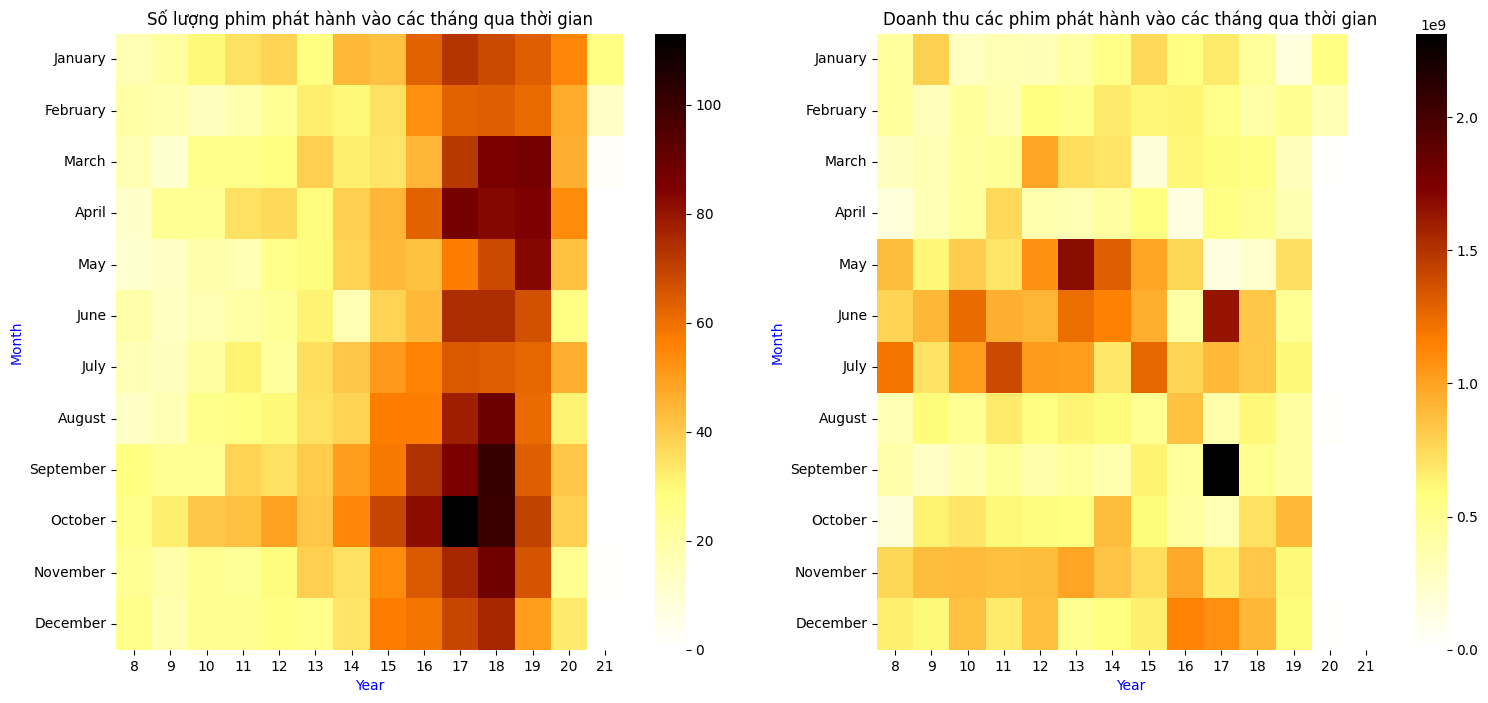

In [28]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,8))
g= sns.heatmap(data=df1,
            cmap='afmhot_r',ax=ax1)
ax1.set_title('Số lượng phim phát hành vào các tháng qua thời gian')
ax1.set_xlabel('Year',color="blue")
ax1.set_ylabel('Month',color="blue")

g= sns.heatmap(data=df2,
            cmap='afmhot_r',ax=ax2)
ax2.set_title('Doanh thu các phim phát hành vào các tháng qua thời gian')

ax2.set_xlabel('Year',color="blue")
ax2.set_ylabel('Month',color="blue")

Tháng 2 và Tháng 7 thường có số lượng phim phát hành tương đối ít hơn so với các tháng khác trong năm. Hai tháng này là thời điểm hợp lý để phát hành nội dung trên Netflix

**Lưu ý:** Đồ thị trên nên xem xét là 2 đồ thị tách biệt bởi lẽ có nhiều bộ phim không có trường dữ liệu BoxOffic để ghi nhận doanh thu phòng vé nên 2 bảng sẽ không mấy tương quan.

#### ***NHẬN XÉT BIỂU ĐỒ THỂ HIỆN SỐ LƯỢNG PHIM ĐƯỢC PHÁT HÀNH (BÊN TRÁI)***
- Xét từ trái qua:
    - Số lượng phim của từng năm có sự thay đổi:
      - Từ 2008-2012, lượng phim ít, các nhà sản xuất phim chó xu hướng đưa phim ra mắt vào tháng 1,4 và 10 (đặc biệt là tháng 10).
      - Số lượng phim bắt đầu bùng nổ ở các năm 2015, 2016, 2017,2018 với mật độ dày đặc, lượng phát hành phim là xuyên suốt cả năm
      - Ở năm 2019 thì có dấu hiệu hạ nhiệt và cho tới năm 2020, dưới tác động của dịch covid trên toàn cầu mà ngành giải trí phim cũng chịu một tác động nặng nề.
- Xét từ trên xuống:
  - Ở các tháng trong cùng một năm thì lượng phân bố không đồng đều
      - Nhìn chung thì thời điểm vàng được các nhà làm phim lựa chọn nhiều nhất trong năm là tháng 10, đỉnh điểm là tháng 10 năm 2017 với 113 bộ phim được ra mắt
      - Thời điểm phim ít được quan tâm nhất là tháng 2 và tháng 7 trong năm. Đồng thời xét ở những năm (2008 - 2014) thì có thêm tháng 6, 11 và 12